# Free technical test 
Francesco Cusimano

In [1]:
# Imports
import datetime
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from yaml import SafeLoader, load

## Data cleaning

In [2]:
file = "fake_liste_users_revo_130122.yaml"
with open(file) as yaml_file:
    yaml_contents = load(yaml_file, Loader=SafeLoader)
df = pd.json_normalize(yaml_contents)


most_recent_date = pd.to_datetime("2022-01-13")  # dataset valid up to this date

In [3]:
df.sample(4)

,acquisition_channel,cancel_year_month,duration_month,fiber_or_adsl,has_retention,offer,recruit_year_month,sub_offer,total_bill
5545,pos,N/A,N/A,fiber,False,#11:Freebox Revolution with TV 3999eur,2017-01,11.4:Freebox Revolution with TV 3999eur,2330
8462,online,N/A,N/A,fiber,False,#11:Freebox Revolution with TV 3999eur,2017-01,11.4:Freebox Revolution with TV 3999eur,2420
745,phone,2016-12,11,adsl,False,#11:Freebox Revolution with TV 3999eur,2016-01,11.4:Freebox Revolution with TV 3999eur,740
18471,outgoing call - promo,2019-12,35,adsl,False,#11:Freebox Revolution with TV 3999eur,2017-01,11.4:Freebox Revolution with TV 3999eur,1230


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   acquisition_channel  20000 non-null  object
 1   cancel_year_month    20000 non-null  object
 2   duration_month       20000 non-null  object
 3   fiber_or_adsl        20000 non-null  object
 4   has_retention        20000 non-null  bool  
 5   offer                20000 non-null  object
 6   recruit_year_month   20000 non-null  object
 7   sub_offer            20000 non-null  object
 8   total_bill           20000 non-null  int64 
dtypes: bool(1), int64(1), object(7)
memory usage: 1.2+ MB


In [5]:
df.describe(include="all")

,acquisition_channel,cancel_year_month,duration_month,fiber_or_adsl,has_retention,offer,recruit_year_month,sub_offer,total_bill
count,20000,20000,20000,20000,20000,20000,20000,20000,20000.000000
unique,7,74,74,2,2,2,2,3,NaN
top,phone,N/A,N/A,adsl,False,#11:Freebox Revolution with TV 3999eur,2016-01,11.4:Freebox Revolution with TV 3999eur,NaN
freq,6904,6569,6569,15046,19491,14185,10452,14185,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1612.201500
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1279.222431
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1465.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2580.000000


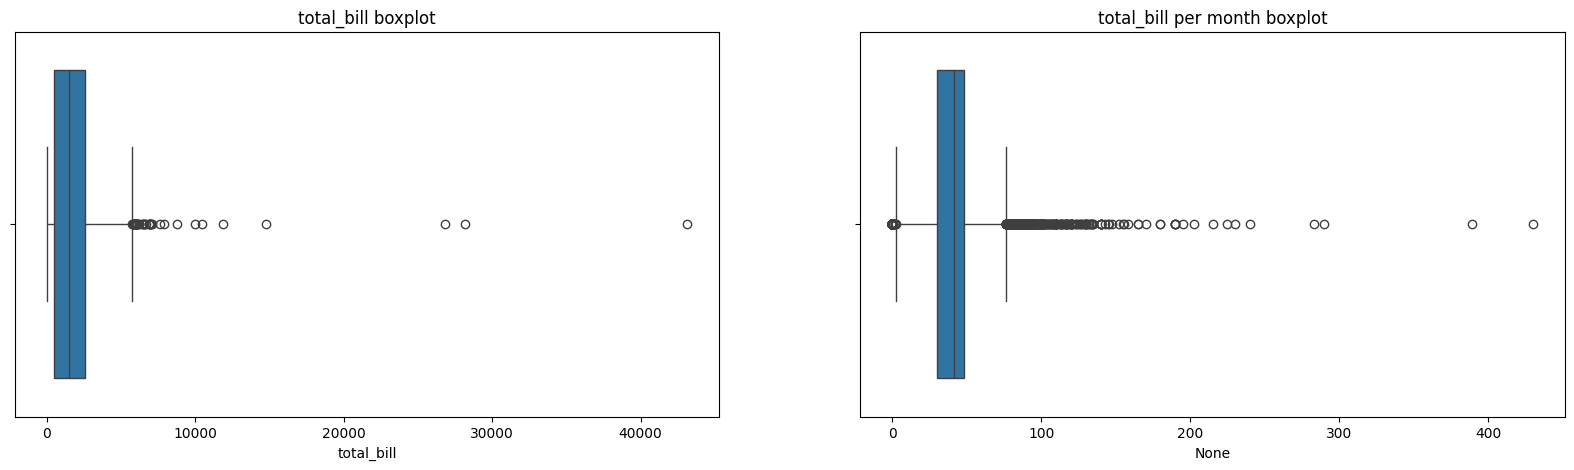

In [6]:
# There are several outliers in the total_bill column, even when normalising for subscription duration.
# Whether it is due to an error or it represents a true ammount, a more detailed study is needed.

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
sns.boxplot(x=df.total_bill, ax=ax1).set_title("total_bill boxplot")
sns.boxplot(
    x=df.total_bill / df.duration_month.replace("N/A", np.nan).astype(float), ax=ax2
).set_title("total_bill per month boxplot")
plt.show()

In [7]:
for var in [
    "recruit_year_month",
    "acquisition_channel",
    "offer",
    "sub_offer",
    "fiber_or_adsl",
]:
    print(
        pd.concat(
            [df[var].value_counts(), df[var].value_counts(normalize=True)], axis=1
        ),
        end="\n\n",
    )

                    count  proportion
recruit_year_month                   
2016-01             10452      0.5226
2017-01              9548      0.4774

                       count  proportion
acquisition_channel                     
phone                   6904     0.34520
online                  6151     0.30755
outgoing call - promo   4663     0.23315
pos                     2175     0.10875
mail                      81     0.00405
outgoing call             23     0.00115
other                      3     0.00015

                                        count  proportion
offer                                                    
#11:Freebox Revolution with TV 3999eur  14185     0.70925
#8:Freebox Revolution 2999eur            5815     0.29075

                                                    count  proportion
sub_offer                                                            
11.4:Freebox Revolution with TV 3999eur             14185     0.70925
8.2:Freebox Revolution 2999eur    

In [8]:
# Functions to perform data cleaning


def set_dtypes(df: pd.DataFrame) -> pd.DataFrame:
    """Cast variables to correct data type"""
    return df.replace("N/A", np.nan).astype(
        {
            "acquisition_channel": "category",
            "cancel_year_month": "datetime64[ns]",
            "duration_month": float,
            "fiber_or_adsl": "category",
            "has_retention": int,
            "offer": "category",
            "recruit_year_month": "datetime64[ns]",
            "sub_offer": "category",
            "total_bill": int,
        }
    )


def add_missing_durations(df: pd.DataFrame) -> pd.DataFrame:
    """Add durations for users who did not cancel their offer"""
    return df.assign(
        duration_month=lambda x: np.where(
            x.duration_month.isna(),
            (
                most_recent_date.to_period("M") - x.recruit_year_month.dt.to_period("M")
            ).apply(lambda y: y.n),
            x.duration_month,
        )
    )


def add_features(df: pd.DataFrame) -> pd.DataFrame:
    """Add new features"""
    return df.assign(
        # tv_offer=df.offer.str.contains("TV"),
        # promo_offer=df.sub_offer.str.contains("Promo"),
        # avg_monthly_bill=lambda x: np.where(
        #     x.total_bill != 0, x.total_bill / x.duration_month, 0
        # ),
        avg_monthly_bill=lambda x: np.select(
            condlist=[x.total_bill == 0, x.duration_month == 0, True],
            choicelist=[0, x.total_bill, x.total_bill / x.duration_month],
        ),
        churn=df.cancel_year_month.notnull(),
    )


def remove_outliers(df: pd.DataFrame, var: str = "avg_monthly_bill") -> pd.DataFrame:
    """Remove users with outlier values using Interquantile Range method"""
    q25, q75 = df[var].quantile(0.25), df[var].quantile(0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    df_without_outliers = df.loc[df[var].between(lower, upper)]

    print(f"Outlier lower / upper bound set at {lower} / {upper} for {var}")
    print(f"Removing {len(df) - len(df_without_outliers)} outliers")
    return df_without_outliers




In [9]:
clean_df = (
    df.pipe(set_dtypes)
    .pipe(add_missing_durations)
    .pipe(add_features)
    # .pipe(remove_outliers)
)
clean_df

,acquisition_channel,cancel_year_month,duration_month,fiber_or_adsl,has_retention,offer,recruit_year_month,sub_offer,total_bill,avg_monthly_bill,churn
0,phone,2019-07-01,42.0,adsl,0,#11:Freebox Revolution with TV 3999eur,2016-01-01,11.4:Freebox Revolution with TV 3999eur,1810,43.095238,True
1,online,2018-07-01,18.0,adsl,0,#11:Freebox Revolution with TV 3999eur,2017-01-01,11.4:Freebox Revolution with TV 3999eur,670,37.222222,True
2,phone,2018-03-01,26.0,adsl,0,#11:Freebox Revolution with TV 3999eur,2016-01-01,11.4:Freebox Revolution with TV 3999eur,1030,39.615385,True
3,phone,NaT,60.0,fiber,0,#11:Freebox Revolution with TV 3999eur,2017-01-01,11.4:Freebox Revolution with TV 3999eur,2470,41.166667,False
4,phone,2019-02-01,37.0,adsl,0,#11:Freebox Revolution with TV 3999eur,2016-01-01,11.4:Freebox Revolution with TV 3999eur,2060,55.675676,True
...,...,...,...,...,...,...,...,...,...,...,...
19995,phone,2019-02-01,37.0,adsl,0,#11:Freebox Revolution with TV 3999eur,2016-01-01,11.4:Freebox Revolution with TV 3999eur,1620,43.783784,True
19996,phone,NaT,72.0,adsl,0,#8:Freebox Revolution 2999eur,2016-01-01,8.2:Freebox Revolution 2999eur,3130,43.472222,False
19997,online,2017-01-01,12.0,adsl,0,#11:Freebox Revolution with TV 3999eur,2016-01-01,11.4:Freebox Revolution with TV 3999eur,430,35.833333,True
19998,outgoing call - promo,2018-04-01,15.0,fiber,0,#8:Freebox Revolution 2999eur,2017-01-01,8.57:Freebox Revolution 2999eur | Promo : 999e...,280,18.666667,True


Outlier lower / upper bound set at 15.41666666666666 / 66.75 for avg_monthly_bill
Removing 2816 outliers


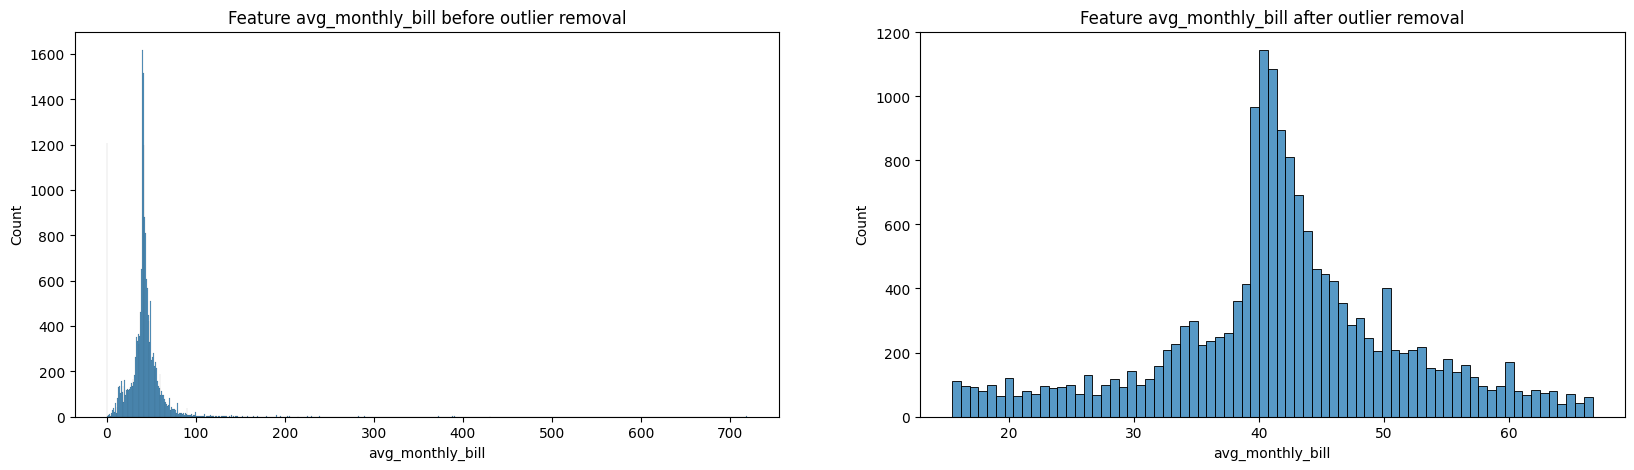

In [10]:
# I have finally decided not to remove the outliers for this analysis
# This plot shows the impact of outlier removal

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))
sns.histplot(
    x=clean_df.avg_monthly_bill,
    ax=ax1,
).set_title("Feature avg_monthly_bill before outlier removal")
sns.histplot(x=clean_df.pipe(remove_outliers).avg_monthly_bill, ax=ax2).set_title(
    "Feature avg_monthly_bill after outlier removal"
)
plt.show()

## Key business insights

- Churn rate: number of cancellations in month M over the user base at the end of M-1
- Average revenue per user (ARPU): total revenue on a segment of users divided by the number of
users in the segment

In [11]:
# getting months covering our period of interest

all_months = pd.date_range(
    start=clean_df.recruit_year_month.min(),
    end=most_recent_date,
    freq="ME",
)
all_months

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
      

In [12]:
def get_active_users(df: pd.DataFrame, date: datetime.date) -> int:
    active = (df.recruit_year_month < date) & (
        df.cancel_year_month.isna() | (df.cancel_year_month > date)
    )
    return active.sum()


def get_cancellations(date: datetime.date) -> int:
    monthly_cancellations = (
        clean_df["cancel_year_month"].dt.to_period("M").value_counts().sort_index()
    )
    return monthly_cancellations[date]

def get_churn_df(df:pd.DataFrame, months:list[datetime]=all_months) -> pd.DataFrame:
    """
    Returns dataframe with following columns:
    - active_users_at_end_of_month
    - cancellations_during_month
    - channel:_var_ (survival rate for each acquisition channel)
    """
    churn_df = pd.DataFrame()
    
    for month in months:
        churn_data_dict = {
            "active_users_at_end_of_month": [get_active_users(df, month)],
            "cancellations_during_month": [get_cancellations(month)],
        }
    
        # adding survival rate per acquisition channel
        for var in df.acquisition_channel.unique():
            channel_df = df[df.acquisition_channel == var]
            active_users_channel = get_active_users(channel_df, month)
            total_channel = len(channel_df[channel_df.recruit_year_month < month])
            churn_data_dict[f"channel:{var}"] = (active_users_channel / total_channel) * 100
    
        temp_df = pd.DataFrame(index=[month], data=churn_data_dict)
        churn_df = pd.concat([churn_df, temp_df])
    
    return churn_df.assign(
        churn_rate=lambda x: (
            x.cancellations_during_month / x.active_users_at_end_of_month.shift(1)
        )
        * 100
    )
    
churn_df = get_churn_df(clean_df)
churn_df 

/var/folders/0_/lj96yyxj731ghy05p9dc27cr0000gn/T/ipykernel_8892/79013111.py:34: RuntimeWarning: invalid value encountered in scalar divide
  churn_data_dict[f"channel:{var}"] = (active_users_channel / total_channel) * 100


,active_users_at_end_of_month,cancellations_during_month,channel:phone,channel:online,channel:outgoing call - promo,channel:pos,channel:mail,channel:outgoing call,channel:other,churn_rate
2016-01-31,10217,235,97.633447,97.343664,98.260870,98.862642,94.000000,NaN,50.000000,NaN
2016-02-29,10001,216,95.740205,94.438296,96.793478,97.812773,94.000000,NaN,50.000000,2.114124
2016-03-31,9876,125,94.583224,92.833426,96.195652,96.850394,92.000000,NaN,50.000000,1.249875
2016-04-30,9745,131,93.399947,91.034864,95.543478,96.062992,92.000000,NaN,50.000000,1.326448
2016-05-31,9596,149,91.901131,89.125623,95.054348,94.925634,90.000000,NaN,50.000000,1.528989
...,...,...,...,...,...,...,...,...,...,...
2021-08-31,6882,60,37.528969,33.246627,26.935449,43.494253,34.567901,60.869565,66.666667,0.864304
2021-09-30,6804,78,37.065469,32.921476,26.656659,42.942529,33.333333,60.869565,66.666667,1.133391
2021-10-31,6742,62,36.659907,32.645098,26.442205,42.666667,33.333333,56.521739,66.666667,0.911229
2021-11-30,6672,70,36.254345,32.384978,26.077632,42.252874,33.333333,56.521739,66.666667,1.038268


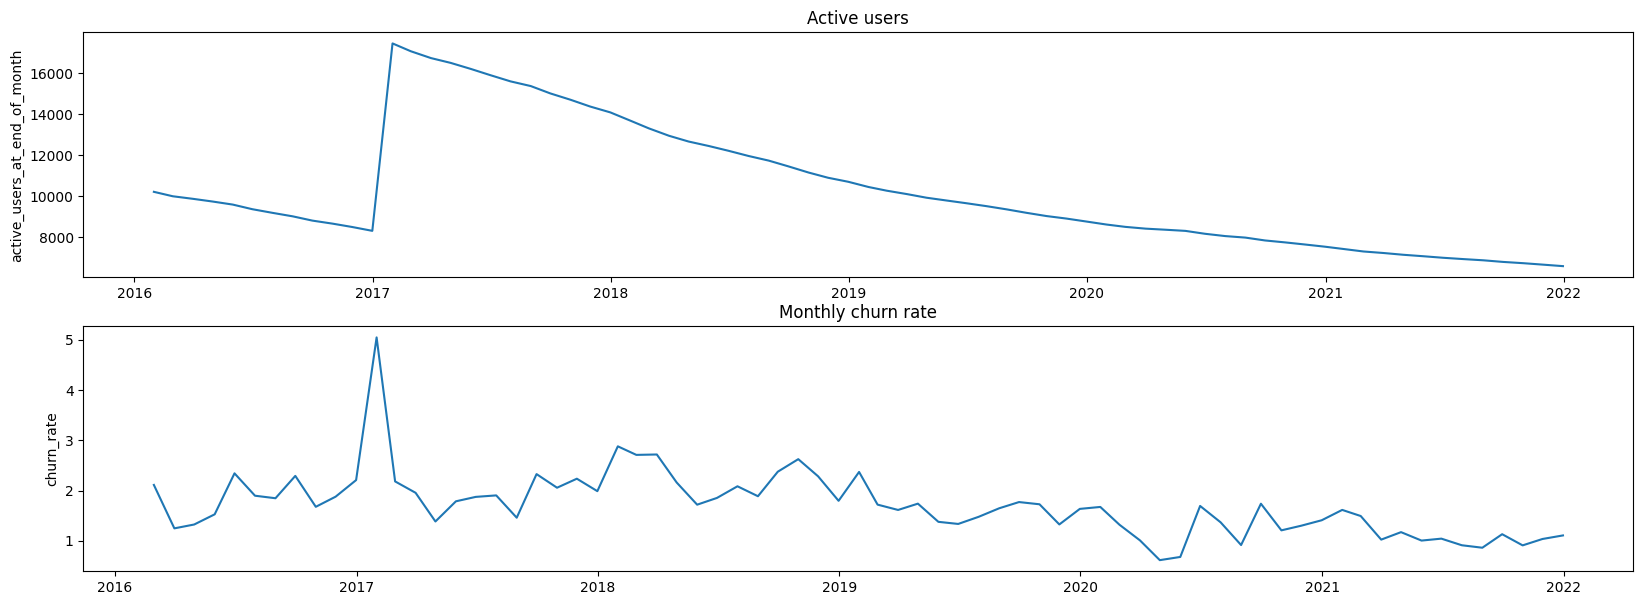

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 7))
sns.lineplot(churn_df.active_users_at_end_of_month, ax=ax1).set_title("Active users")
sns.lineplot(churn_df.churn_rate, ax=ax2).set_title("Monthly churn rate")
plt.show()

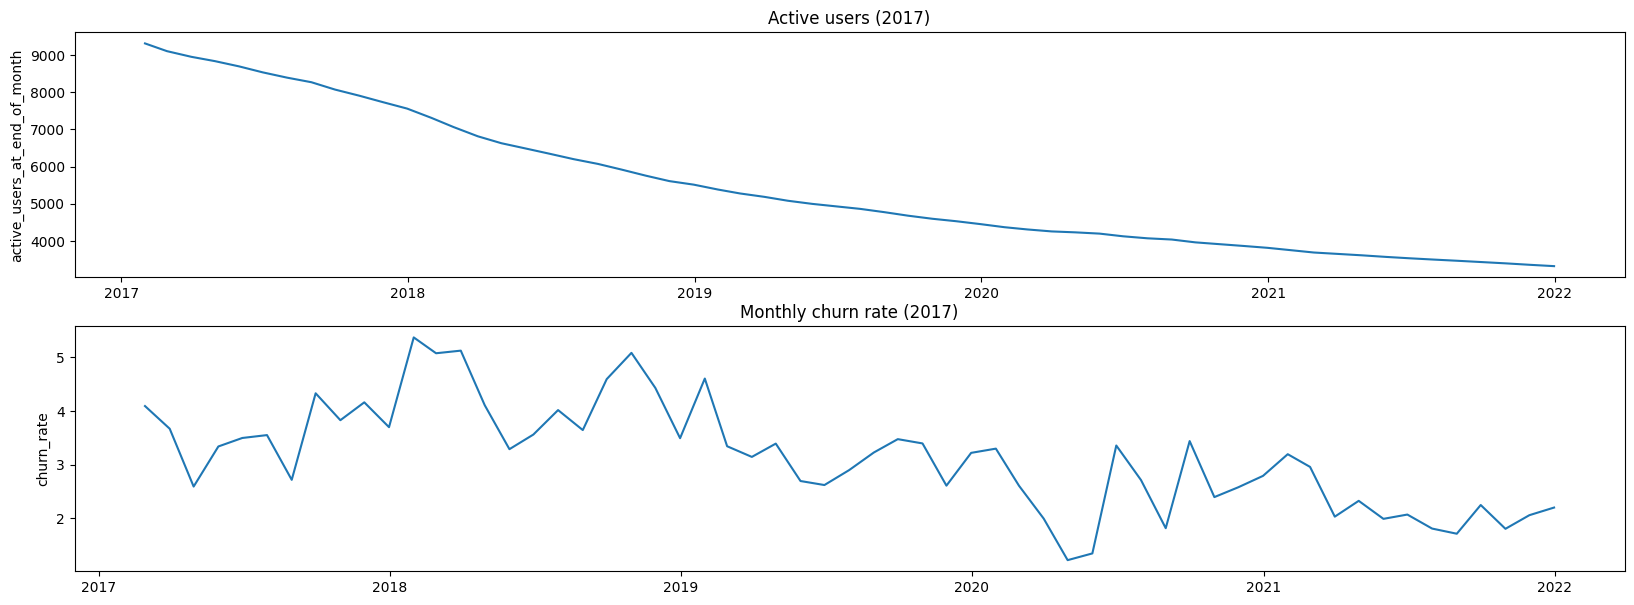

In [14]:
# Zooming in on 2017 to observe the behavior of a single "intake"
clean_df_2017 = clean_df[clean_df.recruit_year_month.dt.year == 2017]
churn_df_2017 = get_churn_df(clean_df_2017,all_months[12:])

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20, 7))
sns.lineplot(churn_df_2017.active_users_at_end_of_month, ax=ax1).set_title(
    "Active users (2017)"
)
sns.lineplot(churn_df_2017.churn_rate, ax=ax2).set_title("Monthly churn rate (2017)")
plt.show()

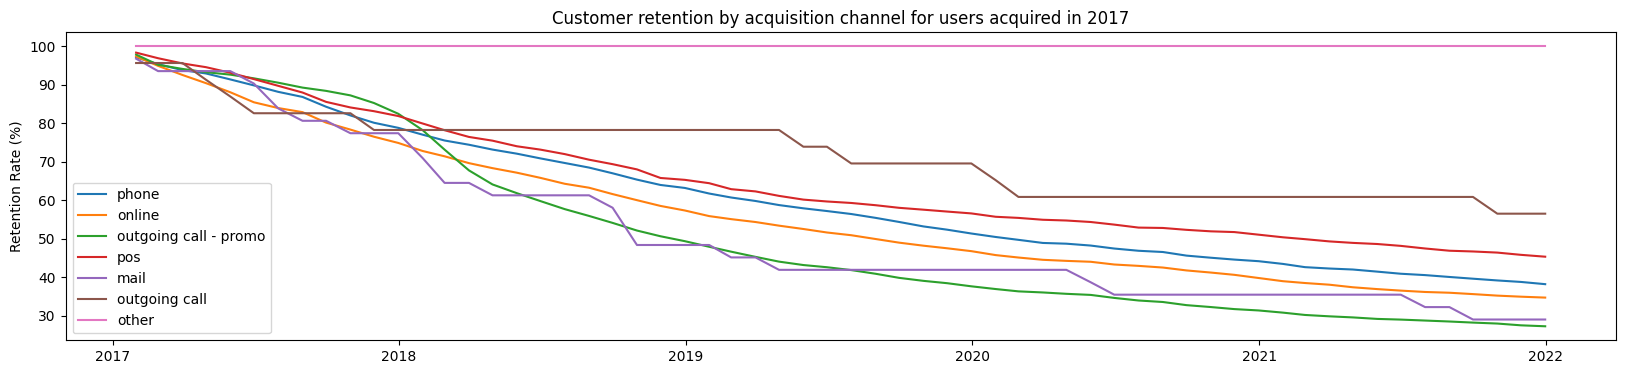

In [15]:
fig, ax1 = plt.subplots(figsize=(20, 4))
for var in clean_df.acquisition_channel.unique():
    sns.lineplot(churn_df_2017[f"channel:{var}"], label=var, ax=ax1)
ax1.set_ylabel("Retention Rate (%)")
ax1.set_title("Customer retention by acquisition channel for users acquired in 2017")
plt.show()

,Period (Months),Churn Rate (%),Churned Customers
0,0,2.471722,236
1,1,4.650189,444
2,2,6.242145,596
3,3,7.457059,712
4,4,8.944282,854
5,5,10.620025,1014
6,6,12.107248,1156
7,7,13.395475,1279
8,8,15.458735,1476
9,9,17.186845,1641


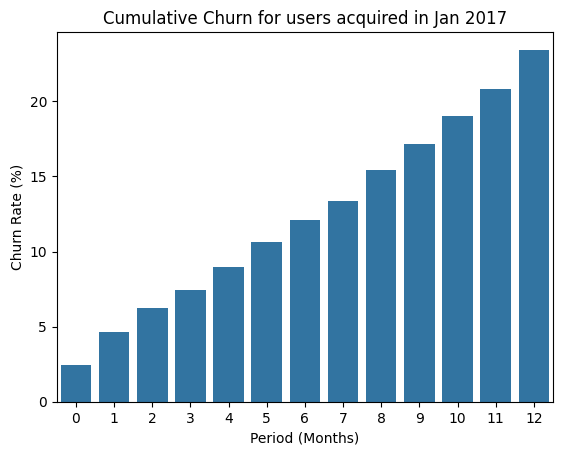

In [26]:
def get_churn_over_months(df: pd.DataFrame, months: int) -> float:
    total_customers = len(df)
    churned = len(df[df["duration_month"] <= months])
    return (churned / total_customers) * 100


churn_periods = range(13)
churn_by_period_df = pd.DataFrame(
    [
        {
            "Period (Months)": period,
            "Churn Rate (%)": get_churn_over_months(clean_df_2017, period),
            "Churned Customers": len(
                clean_df_2017[clean_df_2017["duration_month"] <= period]
            ),
        }
        for period in churn_periods
    ]
)
display(churn_by_period_df)
sns.barplot(data=churn_by_period_df, x="Period (Months)", y="Churn Rate (%)").set_title(
    "Cumulative Churn for users acquired in Jan 2017"
)
plt.show()

,users,total_bill,ARPU
acquisition_channel,,,
outgoing call,23,50340,2188.695652
pos,2175,4063680,1868.358621
phone,6904,12650150,1832.292874
other,3,5080,1693.333333
mail,81,134680,1662.716049
online,6151,9940330,1616.051049
outgoing call - promo,4663,5399770,1158.003431


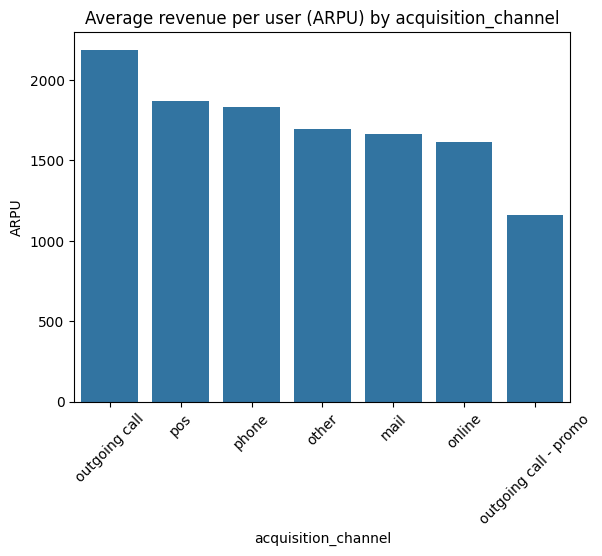

,users,total_bill,ARPU
fiber_or_adsl,,,
fiber,4954,11333040,2287.654421
adsl,15046,20910990,1389.803935


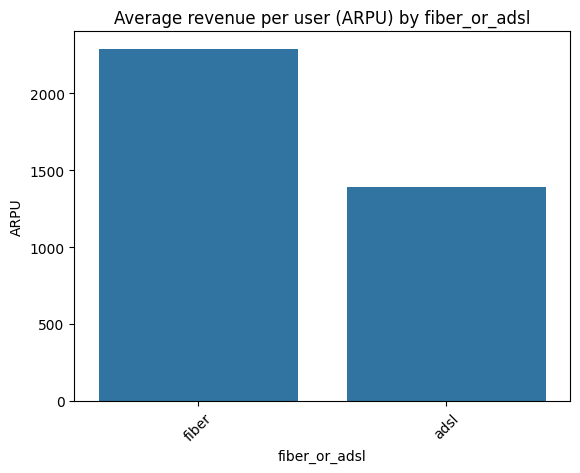

,users,total_bill,ARPU
has_retention,,,
1,509,1281370,2517.426326
0,19491,30962660,1588.561900


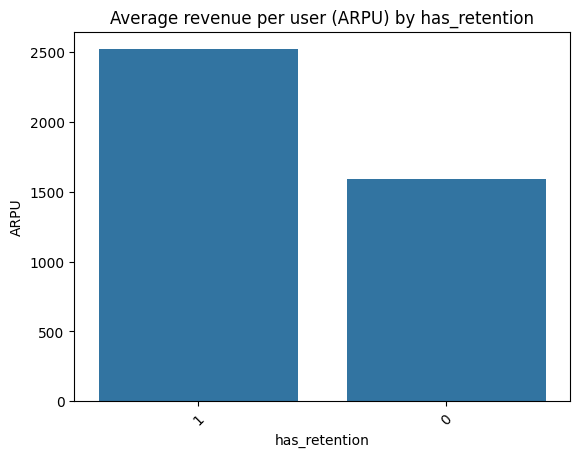

In [27]:
for segment_var in [
    "acquisition_channel",
    "fiber_or_adsl",
    "has_retention",
]:
    segment_df = (
        clean_df.groupby(segment_var)
        .agg(
            users=("total_bill", "count"),
            total_bill=("total_bill", "sum"),
            ARPU=("total_bill", "mean"),
        )
        .sort_values("ARPU", ascending=False)
    )
    display(segment_df)
    ax = sns.barplot(data=segment_df, x=segment_var, y="ARPU", order=segment_df.index)
    ax.set_title(f"Average revenue per user (ARPU) by {segment_var}")
    ax.tick_params(axis="x", labelrotation=45)
    plt.show()

## Churn detection

In [18]:
clean_df.columns

Index(['acquisition_channel', 'cancel_year_month', 'duration_month',
       'fiber_or_adsl', 'has_retention', 'offer', 'recruit_year_month',
       'sub_offer', 'total_bill', 'avg_monthly_bill', 'churn'],
      dtype='object')

In [19]:
# Splitting dataset to only include variables used in prediction and the target

prediction_vars = [
    "acquisition_channel",
    "fiber_or_adsl",
    "has_retention",
    "recruit_year_month",
    "avg_monthly_bill",
    "offer",
    "sub_offer",
]

X = clean_df[prediction_vars]
y = clean_df["churn"]

In [20]:
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import Binarizer, OneHotEncoder

In [21]:
avg_monthly_bill_pipeline = make_pipeline(
    make_union(
        Binarizer(threshold=1),  # flagging users paying less than 1 euro per month
        Binarizer(threshold=100),  # flagging users paying more than 100 euro per month
    )
)

col_tfm = make_column_transformer(
    (OneHotEncoder(), ["acquisition_channel", "fiber_or_adsl", "offer", "sub_offer"]),
    (avg_monthly_bill_pipeline, ["avg_monthly_bill"]),
    ("passthrough", ["avg_monthly_bill", "has_retention"]),
    verbose_feature_names_out=False,
)
model_pipeline = make_pipeline(col_tfm, LogisticRegression(max_iter=1000))


model_pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['acquisition_channel',
                                                   'fiber_or_adsl', 'offer',
                                                   'sub_offer']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('featureunion',
                                                                   FeatureUnion(transformer_list=[('binarizer-1',
                                                                                                   Binarizer(threshold=1)),
                                                                                                  ('binarizer-2',
                                                                                                   Binarizer(threshold=100))]))]),
                                                  ['avg_monthly_bill']),
                                                 ('passthrough', 'passthrough',
                                                  ['avg_monthly_bill',
                                                   'has_retention'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [22]:
scores = cross_val_score(model_pipeline, X, y, cv=5, n_jobs=-1)
scores.mean(), scores

(np.float64(0.7599), array([0.76825, 0.767  , 0.76   , 0.75625, 0.748  ]))

In [23]:
model_pipeline.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['acquisition_channel',
                                                   'fiber_or_adsl', 'offer',
                                                   'sub_offer']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('featureunion',
                                                                   FeatureUnion(transformer_list=[('binarizer-1',
                                                                                                   Binarizer(threshold=1)),
                                                                                                  ('binarizer-2',
                                                                                                   Binarizer(threshold=100))]))]),
                                                  ['avg_monthly_bill']),
                                                 ('passthrough', 'passthrough',
                                                  ['avg_monthly_bill',
                                                   'has_retention'])],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [30]:
feature_names = model_pipeline[:-1].get_feature_names_out()

odds = pd.DataFrame(
    data={"odds": np.exp(model_pipeline[-1].coef_[0])},
    index=feature_names,
).sort_values("odds", ascending=False)

odds

,odds
binarizer-2__avg_monthly_bill,6.000705
fiber_or_adsl_adsl,4.845057
sub_offer_8.57:Freebox Revolution 2999eur | Promo : 999eur for 1 year,3.233735
offer_#8:Freebox Revolution 2999eur,3.008002
acquisition_channel_online,1.923678
acquisition_channel_phone,1.773128
acquisition_channel_outgoing call - promo,1.645866
acquisition_channel_pos,1.580334
acquisition_channel_mail,1.466179
sub_offer_11.4:Freebox Revolution with TV 3999eur,1.309472


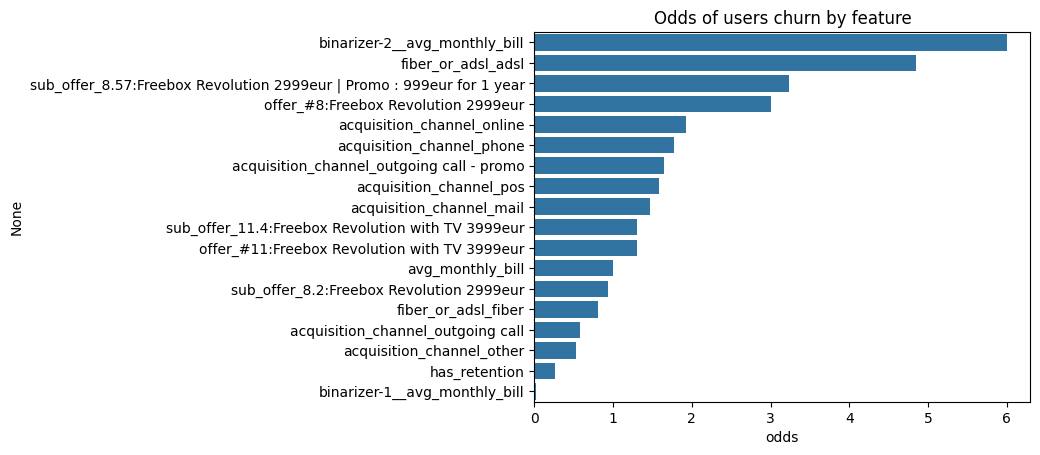

In [31]:
sns.barplot(y=odds.index, x=odds.odds).set_title("Odds of users churn by feature")
plt.show()